# Stabilitas dan Konvergensi pada Solusi *Finite Difference*

William - 1901460373

Untuk menyelesaikan *Heat-Conduction Equation*, kita dapat menggunakan metode *Finite Difference*.

Jadi, dengan kata lain, untuk menyelesaikan/memecahkan masalah

$$
    k \, \frac{\partial^2T}{\partial x^2} = \frac{\partial T}{\partial t}
$$
dapat menggunakan metode *Finite Difference*, yaitu:
$$
    \begin{aligned}
        k \, \frac{T^{j}_{i+1} - 2 T^{j}_{i} + T^{j}_{i-1}}{(\Delta x)^2} &= \frac{T^{j+1}_{i} - T^{j}_{i}}{\Delta t}
        &
    \end{aligned}
$$

yang jika diubah ke dalam bentuk eksplisitnya menjadi

$$
    \boxed{T^{j+1}_{i} = T^{j}_{i} + \lambda \, (T^{j}_{i+1} - 2 T^{j}_{i} + T^{j}_{i-1})}
$$
di mana $\displaystyle \lambda = \frac{k \, \Delta t}{(\Delta x)^2}$, $i$ adalah indeks posisi, dan $j$ adalah indeks waktu.

Bentuk eksplisit di atas, dapat dinyatakan dalam fungsi *Python* berikut:

In [1]:
def FiniteDiff(T, lamb, nt, nx):
    for j in range(nt):
        for i in range(1,nx):
            T[j+1,i] = T[j,i] + lamb*(T[j,i+1]-2*T[j,i]+T[j,i-1])
    return T

Pada saat kita melihat *Heat-Conduction Equation*, kita tahu bahwa data-data yang diberikan oleh masalah tersebut adalah:
1. fungsi $\displaystyle T(x,t)$,
2. konstanta $k$,
3. panjang batang $L \text{ cm}$,
4. nilai pada ujung batang.

Ini berarti untuk menggunakan metode *Finite Difference* kita perlu untuk menentukan $\Delta t$ dan $\Delta x$ agar kita dapat menemukan nilai $\lambda$.

## Syarat Solusi Stabil dan Konvergen

Pertama-tama, kita harus tahu terlebih dahulu, bahwa $\Delta x$ merepresentasikan panjang segmen dari panjang objek yang sudah diketahui dan $\Delta t$ merepresentasikan berapa lama waktu tiap "langkah" yang akan kita ambil dari waktu awal hingga waktu akhir.

Kemudian, untuk menentukan solusi yang ***konvergen*** berarti $\Delta x$ dan $\Delta t$ haruslah menuju $0$.
Lalu, untuk solusi yang ***stabil*** berarti kesalahan (*error*) yang terjadi tidak semakin besar melainkan semakin kecil.

Jadi, untuk menentukan solusi eksplisit yang ***konvergen*** dan ***stabil*** haruslah memenuhi kondisi (Carnahan et al., 1969)
$$
    \lambda \leq \frac{1}{2}
$$
atau
$$
    \Delta t \leq \frac{1}{2} \, \frac{(\Delta x)^2}{k}
$$.

Tapi perlu dijadikan catatan, bahwa syarat di atas, yaitu $\displaystyle \lambda \leq \frac{1}{2}$ dapat menyebabkan solusi kita menjadi berosilasi. Hal ini dapat di-*handle* dengan syarat $\displaystyle \lambda \leq \frac{1}{4}$ atau juga bisa di-*handle* dengan syarat $\displaystyle \lambda = \frac{1}{6}$ yang dapat meminimalisir terjadinya kesalahan pemotongan (*truncate error*) (Carnahan et al., 1969).

Agar dapat memperjelas masalah stabilitias dan konvergensi di atas, kita akan langsung masuk ke dalam contoh soal berikut:

## Contoh Soal

Diketahui panjang batang sebesar $10 \,\, \text{cm}$ dan beberapa nilai berikut:
- $\displaystyle k' = 0.49 \,\, \text{cal}/(s \cdot \text{cm} \cdot  \phantom{}^{\circ}C)$,
- $\Delta x = 2 \text{cm}$.

Pada saat $t=0$, suhu pada tengah batang tersebut adalah $0^{\circ}C$ dan suhu pada kedua ujung batang selalu konstan di setiap waktu dengan nilai $T(0) = 100^{\circ}C$ dan $T(10) = 50^{\circ}C$. Gunakan metode eksplisit dari $t=0 \text{ s}$ hingga $t=60 \text{ s}$!

### Solusi Tidak Stabil

Untuk menggunakan metode eksplisit, kita harus menentukan terlebih dahulu $\lambda$nya agar kita bisa menggunakan metode yang ada.

Sekarang, kita akan menunjukkan solusi yang tidak konvergen maupun stabil.

Jadi, kita akan menggunakan negasi syarat di atas:
$$
    \lambda > \frac{1}{2}
$$.
Sehingga, diperoleh
$$
    \begin{aligned}
        \Delta t &> \frac{1}{2} \, \frac{(\Delta x)^2}{k}
        \\
        \Delta t &> \frac{1}{2} \, \frac{2^2}{0.49}
        \\
        \Delta t &> 4.08163265
    \end{aligned}
$$. Maka dari itu, kita dapat memilih $\Delta t = 5$. Lalu, metode eksplisit yang ada akan dapat diselesaikan dengan *code Python* berikut:

In [2]:
import numpy as np

L = 10            #Panjang batang
tf = 60           #Waktu selesai
k = 0.49          #Konstanta
delx = 2          #Delta x
delt = 5          #Delta t

nx1 = int(L/delx)  #Jumlah segmen batang
nt1 = int(tf/delt) #Jumlah komputasi waktu
T = np.zeros((nt1+1,nx1+1))

#Inisialisasi nilai
T[:,0] = 100      #Nilai pada ujung kiri batang
T[:, -1] = 50     #Nilai pada ujung kanan batang

lamb = (k*delt)/delx**2

#Finite Difference
Tsol1 = FiniteDiff(T, lamb, nt1, nx1)
print(Tsol1)

[[100.           0.           0.           0.           0.
   50.        ]
 [100.          61.25         0.           0.          30.625
   50.        ]
 [100.          47.46875     37.515625    18.7578125   23.734375
   50.        ]
 [100.          73.54785156  32.12275391  33.29511719  36.77392578
   50.        ]
 [100.          64.37692017  58.21369873  34.70781494  42.74412598
   50.        ]
 [100.          82.42108344  47.59131804  54.02740927  42.26610831
   50.        ]
 [100.          71.85493853  72.86665522  42.88150655  54.20691381
   50.        ]
 [100.          89.71346516  53.88107518  68.18422206  44.69336716
   50.        ]
 [100.          74.06662889  84.5890915   45.03539597  62.3318284
   50.        ]
 [100.          96.39582705  53.91744464  79.85609935  44.18451864
   50.        ]
 [100.          72.58537376  95.82287987  42.11983016  69.59534416
   50.        ]
 [100.         103.60980483  48.69678942  91.84170043  40.76444353
   50.        ]
 [100.          67.7

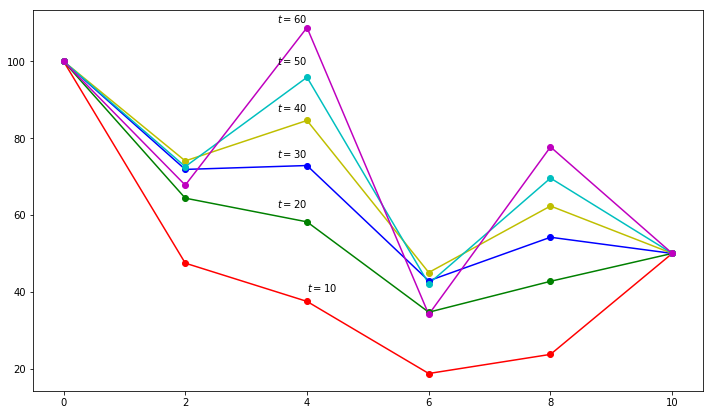

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def idxJ(t, nt, tf):
    return int((t*nt)/tf)

x = np.arange(0,L+delx,delx)

fig = plt.figure(figsize=(12, 7))

#t = 10
y10 = np.array(Tsol1[idxJ(10, nt1, tf),:])
#t = 20
y20 = np.array(Tsol1[idxJ(20, nt1, tf),:])
#t = 30
y30 = np.array(Tsol1[idxJ(30, nt1, tf),:])
#t = 40
y40 = np.array(Tsol1[idxJ(40, nt1, tf),:])
#t = 50
y50 = np.array(Tsol1[idxJ(50, nt1, tf),:])
#t = 60
y60 = np.array(Tsol1[idxJ(60, nt1, tf),:])

#plot garis
plt.plot(x, y10, 'r')
plt.plot(x, y20, 'g')
plt.plot(x, y30, 'b')
plt.plot(x, y40, 'y')
plt.plot(x, y50, 'c')
plt.plot(x, y60, 'm')

#plot titik
plt.plot(x, y10, 'ro')
plt.plot(x, y20, 'go')
plt.plot(x, y30, 'bo')
plt.plot(x, y40, 'yo')
plt.plot(x, y50, 'co')
plt.plot(x, y60, 'mo')

#plot keterangan
plt.text(4, 40, '$t = 10$')
plt.text(3.5, 62, '$t = 20$')
plt.text(3.5, 75, '$t = 30$')
plt.text(3.5, 87, '$t = 40$')
plt.text(3.5, 99, '$t = 50$')
plt.text(3.5, 110, '$t = 60$')

plt.show()

Dapat kita lihat bahwa $\lambda$ dari penyelesaian soal di atas adalah $\lambda = 0.6125$ yang melanggar syarat $\displaystyle \lambda \leq \frac{1}{2}$. Sehingga, semakin lama waktu yang ditempuh, suhu pada batang yang ada mengalami anomali/keanehan.

### Solusi Stabil

Kita akan bandingan dengan $\lambda$ yang memenuhi syarat. Sehingga, kita akan pilih $\Delta t = 3$. Maka, solusinya adalah:

In [4]:
L = 10            #Panjang batang
tf = 60           #Waktu selesai
k = 0.49          #Konstanta
delx = 2          #Delta x
delt = 3          #Delta t

nx2 = int(L/delx)  #Jumlah segmen batang
nt2 = int(tf/delt) #Jumlah komputasi waktu
T = np.zeros((nt2+1,nx2+1))

#Inisialisasi nilai
T[:,0] = 100      #Nilai pada ujung kiri batang
T[:, -1] = 50     #Nilai pada ujung kanan batang

lamb = (k*delt)/delx**2

#Finite Difference
Tsol2 = FiniteDiff(T, lamb, nt2, nx2)
print(Tsol2)

[[100.           0.           0.           0.           0.
   50.        ]
 [100.          36.75         0.           0.          18.375
   50.        ]
 [100.          46.48875     13.505625     6.7528125   23.244375
   50.        ]
 [100.          54.03283594  23.14526484  15.29512031  27.01641797
   50.        ]
 [100.          59.57458635  31.61151911  22.48762532  31.15530748
   50.        ]
 [100.          64.15449865  38.53491535  29.02602948  34.89535879
   50.        ]
 [100.          67.91252354  44.45559666  34.67752356  38.28933591
   50.        ]
 [100.          71.08425051  49.48257542  39.59830646  41.26566392
   50.        ]
 [100.          73.77217285  53.78872217  43.84352917  43.86277856
   50.        ]
 [100.          76.0669812   57.47778187  47.50546175  46.11113329
   50.        ]
 [100.          78.03083486  60.64448498  50.65787369  48.05270752
   50.        ]
 [100.          79.71501947  63.36388891  53.37055477  49.72573607
   50.        ]
 [100.          81.

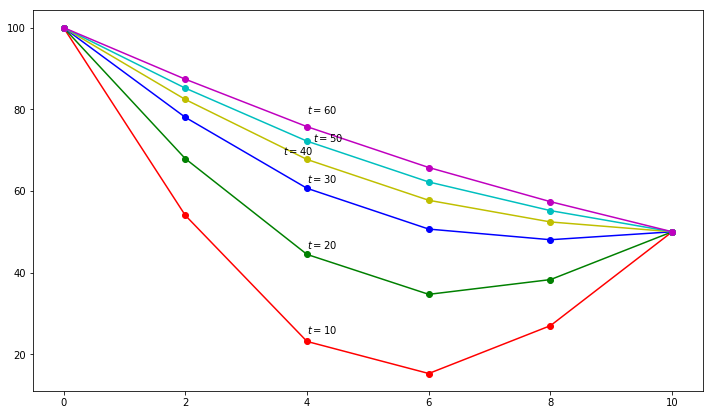

In [5]:
x = np.arange(0,L+delx,delx)

fig = plt.figure(figsize=(12, 7))

#t = 10
y10 = np.array(Tsol2[idxJ(10, nt2, tf),:])
#t = 20
y20 = np.array(Tsol2[idxJ(20, nt2, tf),:])
#t = 30
y30 = np.array(Tsol2[idxJ(30, nt2, tf),:])
#t = 40
y40 = np.array(Tsol2[idxJ(40, nt2, tf),:])
#t = 50
y50 = np.array(Tsol2[idxJ(50, nt2, tf),:])
#t = 60
y60 = np.array(Tsol2[idxJ(60, nt2, tf),:])

#plot garis
plt.plot(x, y10, 'r')
plt.plot(x, y20, 'g')
plt.plot(x, y30, 'b')
plt.plot(x, y40, 'y')
plt.plot(x, y50, 'c')
plt.plot(x, y60, 'm')

#plot titik
plt.plot(x, y10, 'ro')
plt.plot(x, y20, 'go')
plt.plot(x, y30, 'bo')
plt.plot(x, y40, 'yo')
plt.plot(x, y50, 'co')
plt.plot(x, y60, 'mo')

#plot keterangan
plt.text(4, 25, '$t = 10$')
plt.text(4, 46, '$t = 20$')
plt.text(4, 62, '$t = 30$')
plt.text(3.6, 69, '$t = 40$')
plt.text(4.1, 72, '$t = 50$')
plt.text(4, 79, '$t = 60$')

plt.show()

### Perbandingan

Dengan memilih $\Delta t = 3$, kita memperoleh $\lambda = 0.3675$. Sehingga, dapat dilihat dari grafik di atas, tidak terjadi anomali.

Jadi, untuk memperjelas perbedaan yang ada, akan dibuat grafik berikut:

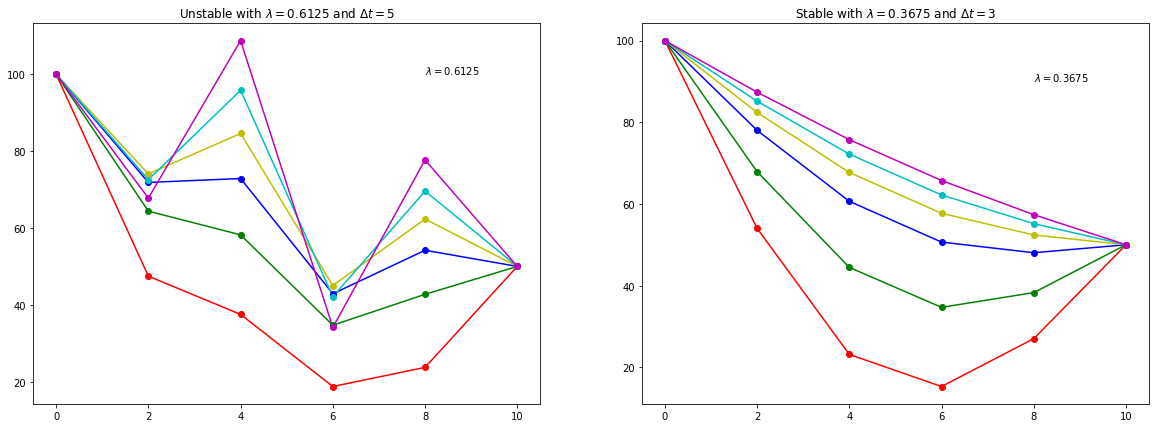

In [10]:
x = np.arange(0,L+delx,delx)

fig = plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
#t = 10
y10a = np.array(Tsol1[idxJ(10, nt1, tf),:])
#t = 20
y20a= np.array(Tsol1[idxJ(20, nt1, tf),:])
#t = 30
y30a= np.array(Tsol1[idxJ(30, nt1, tf),:])
#t = 40
y40a = np.array(Tsol1[idxJ(40, nt1, tf),:])
#t = 50
y50a = np.array(Tsol1[idxJ(50, nt1, tf),:])
#t = 60
y60a = np.array(Tsol1[idxJ(60, nt1, tf),:])

#plot garis
plt.plot(x, y10a, 'r')
plt.plot(x, y20a, 'g')
plt.plot(x, y30a, 'b')
plt.plot(x, y40a, 'y')
plt.plot(x, y50a, 'c')
plt.plot(x, y60a, 'm')

#plot titik
plt.plot(x, y10a, 'ro')
plt.plot(x, y20a, 'go')
plt.plot(x, y30a, 'bo')
plt.plot(x, y40a, 'yo')
plt.plot(x, y50a, 'co')
plt.plot(x, y60a, 'mo')

plt.text(8,100,'$\lambda = 0.6125$')
plt.title('Unstable with $\lambda = 0.6125$ and $\Delta t = 5$')


plt.subplot(1,2,2)
#t = 10
y10b = np.array(Tsol2[idxJ(10, nt2, tf),:])
#t = 20
y20b = np.array(Tsol2[idxJ(20, nt2, tf),:])
#t = 30
y30b = np.array(Tsol2[idxJ(30, nt2, tf),:])
#t = 40
y40b = np.array(Tsol2[idxJ(40, nt2, tf),:])
#t = 50
y50b = np.array(Tsol2[idxJ(50, nt2, tf),:])
#t = 60
y60b = np.array(Tsol2[idxJ(60, nt2, tf),:]) 

#plot garis
plt.plot(x, y10b, 'r')
plt.plot(x, y20b, 'g')
plt.plot(x, y30b, 'b')
plt.plot(x, y40b, 'y')
plt.plot(x, y50b, 'c')
plt.plot(x, y60b, 'm')

#plot titik
plt.plot(x, y10b, 'ro')
plt.plot(x, y20b, 'go')
plt.plot(x, y30b, 'bo')
plt.plot(x, y40b, 'yo')
plt.plot(x, y50b, 'co')
plt.plot(x, y60b, 'mo')

plt.text(8,90, '$\lambda = 0.3675$')
plt.title('Stable with $\lambda = 0.3675$ and $\Delta t = 3$')

plt.show()

### Kesimpulan

Jadi, dengan memilih $\displaystyle \lambda \leq \frac{1}{2}$, kita akan mendapatkan solusi yang ***stabil*** dan ***konvergen***. Atau dengan kata lain, kita harus memilih $\Delta t$ yang memenuhi $\displaystyle \Delta t \leq \frac{(\Delta x)^2}{2k}$. Tapi kita perlu ingat lagi, syarat tersebut dapat mengakibatkan solusi yang ada ber***osilasi***.

Sehingga jika solusi yang ada berosilasi, kita dapat menggunakan syarat $\displaystyle \lambda \leq \frac{1}{4}$ atau $\displaystyle \lambda = \frac{1}{6}$.

## Referensi

Carnahan, B., H.A. Luther, dan J. O. Wilkes, *Applied Numerical Methods*, Wiley, New York, 1969.